## Assigments 3.1

This first part of the assignment requires to implement yourself basic cross-validation strategies.

**Exercise 1.** Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold,train_test_split


import matplotlib.pyplot as plt

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, \
                           random_state=0, n_clusters_per_class=1, weights = [0.5])


In [2]:
from sklearn.utils import shuffle
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
np.random.seed(2123)

data_idx = np.arange(X.shape[0])
# Shuffling the data
#### Mode 1 
# shuffling the data indices
# np.random.shuffle(data_idx)
# getting data and labels at shuffled indices
X_shuffled = X[data_idx,:]
y_shuffled = y[data_idx]


k = 10

fold_size = np.floor(X_shuffled.shape[0]/k)

print('The fold size is:', fold_size)

training_acc = []
testing_acc = []

for i in range(k):
    # We compute the index where the testing data starts  
    begin = int(i*fold_size) 
    # We compute the index where the testing data stops 
    end = int((i+1)*fold_size)
    print(begin,end)
    
    # We extract the testing data in the range [begin, start]  
    testing_data = X_shuffled[begin:end,:]
    # We extract the testing labels in the range [begin, start]
    testing_labels = y_shuffled[begin:end]
    
    # We compute the training indices as the remaining idices of 
    # our data when we remove the testing ones
    training_indices = np.setdiff1d(range(X_shuffled.shape[0]),range(begin,end), assume_unique=True)
  
    # We extract the testing data in the range [begin, start]  
    training_data = X_shuffled[training_indices,:]
    # We extract the testing labels in the range [begin, start]
    training_labels = y_shuffled[training_indices]
    
    # We train the model on the training data
    model.fit(training_data, training_labels)
    
    # We compute the accuracy in the training data
    training_acc.append(model.score(training_data, training_labels))
    # We compute the accuracy in the testing data
    testing_acc.append(model.score(testing_data, testing_labels))
                       
print(training_acc)
print(testing_acc)
        
print('Average training accuracy', np.mean(training_acc))    
print('SD training accuracy', np.std(training_acc))
print('Average testing accuracy', np.mean(testing_acc))    
print('SD testing accuracy', np.std(testing_acc))

The fold size is: 10.0
0 10
10 20
20 30
30 40
40 50
50 60
60 70
70 80
80 90
90 100
[0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556]
[0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Average training accuracy 0.9400000000000001
SD training accuracy 0.008888888888888896
Average testing accuracy 0.9400000000000001
SD testing accuracy 0.07999999999999999


__Exercise 2.__ Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

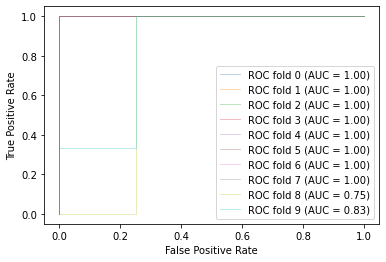

The estimated tpr for fold 0: 
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [3]:
# Within a cross-validation loop
# Run classifier with cross-validation and plot ROC curves

cv = KFold(n_splits=10)

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # We impose the ROC curve to start from 0
    roc_sample[-1][0] = 0.0
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plotting the ROC curve
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    i += 1

plt.legend()
plt.show()

print('The estimated tpr for fold 0: ')
print(roc_sample[0])

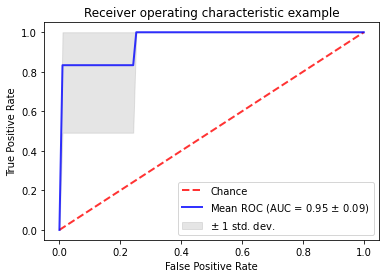

In [4]:
# Summarizing the cross-validation results

# Adding diagonal line of random classification 
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

# Computing mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# We impose the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computing the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)
# Computing the std of the AUCs 
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


# Nice plot of curve with std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Exercise 3.** Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

In [5]:
X, y = make_classification(n_samples = 200, n_features=5, n_redundant=0, n_informative=3, \
                           random_state=0, n_clusters_per_class=1, weights = [0.9])

In [6]:
# weight is 90% negative and 10% positive dataset, unbalanced 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)
clf = model.fit(X_train, y_train)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train==0)/len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train==1)/len(y_train)))

print("*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test==0)/len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test==1)/len(y_test)))

*** Training ***
Elements of class 0: 0.86
Elements of class 1: 0.14
*** Testing ***
Elements of class 0: 0.95
Elements of class 1: 0.05


We observe that the distribution of the data is unbalanced. (weights=0.9) <br>
Therefore we need to use stratified cross-validation instead of the Kfold cross validation. This operation helps to keep the proportion of the classes split on training and testing constant 

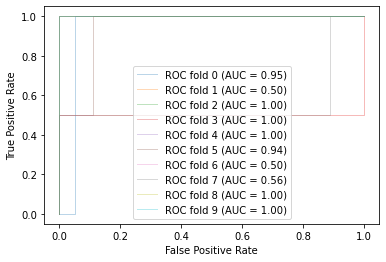

The estimated tpr for fold 0: 
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [7]:
# Within a cross-validation loop
# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # We impose the ROC curve to start from 0
    roc_sample[-1][0] = 0.0
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plotting the ROC curve
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    i += 1

plt.legend()
plt.show()

print('The estimated tpr for fold 0: ')
print(roc_sample[0])

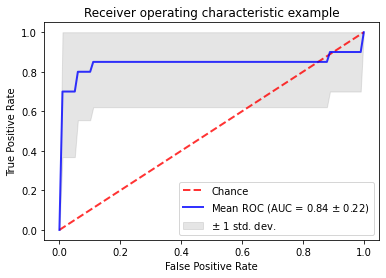

In [8]:
# Summarizing the cross-validation results

# Adding diagonal line of random classification 
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

# Computing mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# We impose the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computing the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)
# Computing the std of the AUCs 
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)


# Nice plot of curve with std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



Model evaluation is an unavoidable topic in feature selection. Cross validation is the most commonly used method for model evaluation in feature selection. Let's suppose for example, we have m samples in the dataset. To evaluate a classfier, training a dataset in the training set and predicting in the new testing set will benchmark the behavior of the model with unseen datatset. The error produced in the test error is often called the **generalization error** which refers to the error in the new sample. From the other side, the training set is used to select features and optimal model. The selection of the optimal model is usually based on the **training error**. Thus, the model with minimum training error is the best model. However, the split of the dataset performed in this case can be done in multiple ways. CV is used to compute all partioning methods and the best average predictive power is selected.  Every time we select the feature, we call the learning algorithm to calculate the CV error. With the increase of feature dimension and the number of samples, the amount of calculation will increase dramatically.<br>
Obviously, the computation of this operation will be very huge when the dimensionality of the dataset increase. Therefore, the cross validation is no longer good generalization performance. Similarly, when the number of algorithms to be used becomes large, cross validation is no longer a good measure of generalization performance. experiments has been conducted to access the variation of the number of algorithms with the accuracy. It has been proven that the CV over-estimate for much smaller algorithms and performs badly as long as number of algorithms increase.